## This notebook plots the OCP and electrolyte parameters used in the paper.

In [ ]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

In [ ]:
import pybamm as pb;import pandas as pd   ;
import numpy as np;import os;import matplotlib.pyplot as plt;
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl
fs=14
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

# Add path to system to ensure Fun_NC can be used
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(
    os.path.join(str_path_0,"Reproduce_Li2024"))
sys.path.append(str_path_1) 
# import all functions 
from Fun_NC import * 
SaveFig_Path = fr'D:\LRHWork\Model_RH\env_PBGEM_NC\SimSave\Li2024_Results\SaveFig'


In [24]:
# functions to define those parameters:
def graphite_LGM50_delithiation_ocp_OKane2023(sto):
    
    u_eq = (
        1.051 * np.exp(-26.76 * sto)
        + 0.1916
        - 0.05598 * np.tanh(35.62 * (sto - 0.1356))
        - 0.04483 * np.tanh(14.64 * (sto - 0.2861))
        - 0.02097 * np.tanh(26.28 * (sto - 0.6183))
        - 0.02398 * np.tanh(38.1 * (sto - 1))
    )

    return u_eq

def graphite_LGM50_lithiation_ocp_OKane2023(sto):
    
    u_eq = (
        0.5476 * np.exp(-422.4 * sto)
        + 0.5705 * np.exp(-36.89 * sto)
        + 0.1336
        - 0.04758 * np.tanh(13.88 * (sto - 0.2101))
        - 0.01761 * np.tanh(36.2 * (sto - 0.5639))
        - 0.0169 * np.tanh(11.42 * (sto - 1))
    )

    return u_eq

def nmc_LGM50_lithiation_ocp_OKane2023(sto):
    

    U = (
        -0.7983 * sto
        + 4.513
        - 0.03269 * np.tanh(19.83 * (sto - 0.5424))
        - 18.23 * np.tanh(14.33 * (sto - 0.2771))
        + 18.05 * np.tanh(14.46 * (sto - 0.2776))
    )

    return U

def nmc_LGM50_delithiation_ocp_OKane2023(sto):
    
    U = (
        -0.7836 * sto
        + 4.513
        - 0.03432 * np.tanh(19.83 * (sto - 0.5424))
        - 19.35 * np.tanh(14.33 * (sto - 0.2771))
        + 19.17 * np.tanh(14.45 * (sto - 0.2776))
    )

    return U

def graphite_LGM50_entropic_change_ORegan2022(sto, c_s_max):
    
    a0 = -0.1112
    a1 = -0.09002 * 0  # fixed fit (see discussion O'Regan et al 2021)
    a2 = 0.3561
    b1 = 0.4955
    b2 = 0.08309
    c0 = 0.02914
    c1 = 0.1122
    c2 = 0.004616
    d1 = 63.9

    dUdT = (
        a0 * sto
        + c0
        + a2 * np.exp(-((sto - b2) ** 2) / c2)
        + a1
        * (np.tanh(d1 * (sto - (b1 - c1))) - np.tanh(d1 * (sto - (b1 + c1))))
    ) / 1000  # fit in mV / K

    return dUdT

def nmc_LGM50_entropic_change_ORegan2022(sto, c_s_max):
    
    a1 = 0.04006
    a2 = -0.06656
    b1 = 0.2828
    b2 = 0.8032
    c1 = 0.0009855
    c2 = 0.02179

    dUdT = (
        a1 * np.exp(-((sto - b1) ** 2) / c1)
        + a2 * np.exp(-((sto - b2) ** 2) / c2)
    ) / 1000
    # fit in mV / K

    return dUdT

def graphite_LGM50_ocp_Chen2020(sto):
    u_eq = (
        1.9793 * np.exp(-39.3631 * sto)
        + 0.2482
        - 0.0909 * np.tanh(29.8538 * (sto - 0.1234))
        - 0.04478 * np.tanh(14.9159 * (sto - 0.2769))
        - 0.0205 * np.tanh(30.4444 * (sto - 0.6103))
    )

    return u_eq

def nmc_LGM50_ocp_Chen2020(sto):
    u_eq = (
        -0.8090 * sto
        + 4.4875
        - 0.0428 * np.tanh(18.5138 * (sto - 0.5542))
        - 17.7326 * np.tanh(15.7890 * (sto - 0.3117))
        + 17.5842 * np.tanh(15.9308 * (sto - 0.3120))
    )

    return u_eq

def electrolyte_conductivity_base_Landesfeind2019(c_e, T, coeffs):
    
    c = c_e / 1000  # mol.m-3 -> mol.l
    p1, p2, p3, p4, p5, p6 = coeffs
    A = p1 * (1 + (T - p2))
    B = 1 + p3 * np.sqrt(c) + p4 * (1 + p5 * np.exp(1000 / T)) * c
    C = 1 + c**4 * (p6 * np.exp(1000 / T))
    sigma_e = A * c * B / C  # mS.cm-1

    return sigma_e / 10

def electrolyte_diffusivity_base_Landesfeind2019(c_e, T, coeffs):
    
    c = c_e / 1000  # mol.m-3 -> mol.l
    p1, p2, p3, p4 = coeffs
    A = p1 * np.exp(p2 * c)
    B = np.exp(p3 / T)
    C = np.exp(p4 * c / T)
    D_e = A * B * C * 1e-10  # m2/s

    return D_e

def electrolyte_TDF_base_Landesfeind2019(c_e, T, coeffs):
    
    c = c_e / 1000  # mol.m-3 -> mol.l
    p1, p2, p3, p4, p5, p6, p7, p8, p9 = coeffs
    tdf = (
        p1
        + p2 * c
        + p3 * T
        + p4 * c**2
        + p5 * c * T
        + p6 * T**2
        + p7 * c**3
        + p8 * c**2 * T
        + p9 * c * T**2
    )

    return tdf

def electrolyte_t_plus_base_Landesfeind2019(c_e, T, coeffs):
    
    c = c_e / 1000  # mol.m-3 -> mol.l
    p1, p2, p3, p4, p5, p6, p7, p8, p9 = coeffs
    tplus = (
        p1
        + p2 * c
        + p3 * T
        + p4 * c**2
        + p5 * c * T
        + p6 * T**2
        + p7 * c**3
        + p8 * c**2 * T
        + p9 * c * T**2
    )

    return tplus

def electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019(c_e, T):
    
    coeffs = np.array(
        [
            -1.28e1,
            -6.12,
            8.21e-2,
            9.04e-1,
            3.18e-2,
            -1.27e-4,
            1.75e-2,
            -3.12e-3,
            -3.96e-5,
        ]
    )

    c_lim = 4000

    t_plus = (
        electrolyte_t_plus_base_Landesfeind2019(c_e, T, coeffs) * (c_e <= c_lim) +
        electrolyte_t_plus_base_Landesfeind2019(c_lim, T, coeffs) * (c_e > c_lim)
    )

    return t_plus

def electrolyte_TDF_EC_EMC_3_7_Landesfeind2019(c_e, T):
    
    coeffs = np.array(
        [2.57e1, -4.51e1, -1.77e-1, 1.94, 2.95e-1, 3.08e-4, 2.59e-1, -9.46e-3, -4.54e-4]
    )

    c_lim = 4000

    TDF = (
        electrolyte_TDF_base_Landesfeind2019(c_e, T, coeffs) * (c_e <= c_lim) +
        electrolyte_TDF_base_Landesfeind2019(c_lim, T, coeffs) * (c_e > c_lim)
    )

    return TDF

def electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019(c_e, T):
    
    coeffs = np.array([1.01e3, 1.01, -1.56e3, -4.87e2])

    c_lim = 4000

    D_e = (
        electrolyte_diffusivity_base_Landesfeind2019(c_e, T, coeffs) * (c_e <= c_lim) +
        electrolyte_diffusivity_base_Landesfeind2019(c_lim, T, coeffs) * (c_e > c_lim)
    )

    return D_e

def electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019(c_e, T):
    
    coeffs = np.array([5.21e-1, 2.28e2, -1.06, 3.53e-1, -3.59e-3, 1.48e-3])

    c_lim = 4000

    sigma_e = (
        electrolyte_conductivity_base_Landesfeind2019(c_e, T, coeffs) * (c_e <= c_lim) +
        electrolyte_conductivity_base_Landesfeind2019(c_lim, T, coeffs) * (c_e > c_lim)
    )

    return sigma_e

# 带入具体数值：
c_e = np.linspace(0, 4e3, 100)
D_e = electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019(c_e, 273.15+25)
TDF = electrolyte_TDF_EC_EMC_3_7_Landesfeind2019(c_e, 273.15+25)
t_0plus = electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019(c_e, 273.15+25)
cond = electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019(c_e, 273.15+25)
sto = np.linspace(0,1,1000)
ocp_gr_deli = graphite_LGM50_delithiation_ocp_OKane2023(sto)
ocp_gr_lith = graphite_LGM50_lithiation_ocp_OKane2023(sto)
ocp_ncm_deli = nmc_LGM50_delithiation_ocp_OKane2023(sto)
ocp_ncm_lith = nmc_LGM50_lithiation_ocp_OKane2023(sto)
ocp_gr_chen = graphite_LGM50_ocp_Chen2020(sto)
ocp_ncm_chen = nmc_LGM50_ocp_Chen2020(sto)
dUdT_gr = graphite_LGM50_entropic_change_ORegan2022(sto, c_s_max=1)*1e3
dUdT_ncm = nmc_LGM50_entropic_change_ORegan2022(sto, c_s_max=1)*1e3


In [8]:
colors = [
    (106, 61, 154, 1),        # 紫色
    (230, 159, 0, 1),        # 橙色
    (86, 180, 233, 1),       # 天蓝色
    (213, 94, 0, 1),         # 红色
]
cm_4s = [(r/255, g/255, b/255, d) for r, g, b, d in colors]

Supplementary Figure 10 saved to D:\LRHWork\Model_RH\env_PBGEM_NC\SimSave\Li2024_Results\SaveFig\Supplementary_Figure_10_Data.xlsx


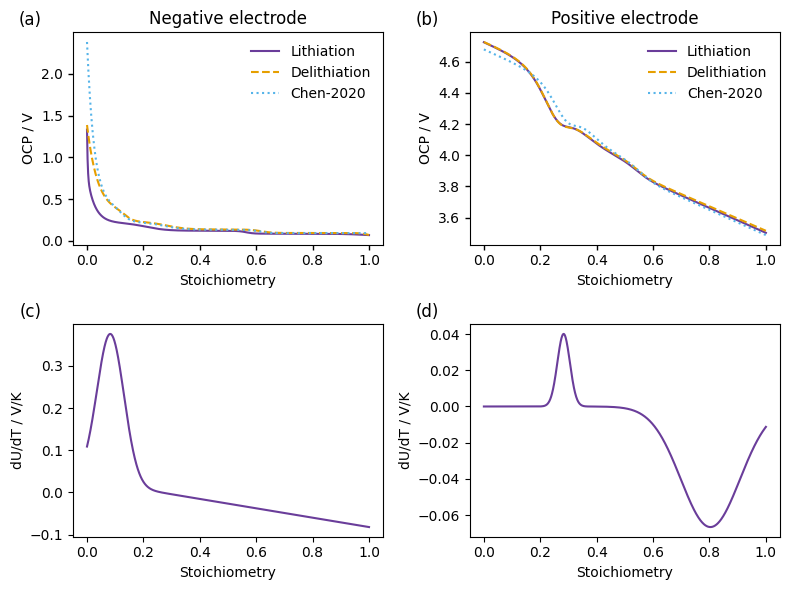

In [ ]:
# plot and save Supplementary Figure 10. Open-circuit potential (OCP) and entropic change of both electrodes. 
excel_file_path = os.path.join(SaveFig_Path, "Supplementary Figure 10.xlsx")
data_for_excel = {}

fig, Axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)
axs = Axs.flatten()
# negative - ocp:
axs[0].plot(sto,ocp_gr_lith, label='Lithiation',color = cm_4s[0], linestyle = '-' )
axs[0].plot(sto,ocp_gr_deli, label='Delithiation',color = cm_4s[1], linestyle = '--')
axs[0].plot(sto,ocp_gr_chen, label='Chen-2020',color = cm_4s[2], linestyle = ':')
dict_fig_a = {}
dict_fig_a['sto'] = sto
dict_fig_a['ocp_gr_lith'] = ocp_gr_lith
dict_fig_a['ocp_gr_deli'] = ocp_gr_deli
dict_fig_a['ocp_gr_chen'] = ocp_gr_chen
df_fig_a = pd.DataFrame.from_dict(dict_fig_a, orient='index').T
data_for_excel['fig(a)'] = df_fig_a

# positive - ocp:
axs[1].plot(sto,ocp_ncm_lith, label='Lithiation',color = cm_4s[0], linestyle = '-' )
axs[1].plot(sto,ocp_ncm_deli, label='Delithiation',color = cm_4s[1], linestyle = '--')
axs[1].plot(sto,ocp_ncm_chen, label='Chen-2020',color = cm_4s[2], linestyle = ':')
dict_fig_b = {}
dict_fig_b['sto'] = sto
dict_fig_b['ocp_ncm_lith'] = ocp_ncm_lith
dict_fig_b['ocp_ncm_deli'] = ocp_ncm_deli
dict_fig_b['ocp_ncm_chen'] = ocp_ncm_chen
df_fig_b = pd.DataFrame.from_dict(dict_fig_b, orient='index').T
data_for_excel['fig(b)']= df_fig_b


# negative - dUdT:
axs[2].plot(sto,dUdT_gr, color = cm_4s[0], linestyle = '-' )
dict_fig_c = {}
dict_fig_c['sto'] = sto
dict_fig_c['dUdT_gr'] = dUdT_gr
df_fig_c = pd.DataFrame.from_dict(dict_fig_c, orient='index').T
data_for_excel['fig(c)'] = df_fig_c

# positive - dUdT:
axs[3].plot(sto,dUdT_ncm, color = cm_4s[0], linestyle = '-' )
dict_fig_d = {}
dict_fig_d['sto'] = sto
dict_fig_d['dUdT_ncm'] = dUdT_ncm
df_fig_d = pd.DataFrame.from_dict(dict_fig_d, orient='index').T
data_for_excel['fig(d)'] = df_fig_d

for i in range(2):    
    # axs[i].set_xlabel("Stoichiometry")
    axs[i].set_ylabel("OCP / V")
    axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) 
    axs[i].legend(prop={'size':fs},loc='best',frameon=False)  
    

for i in [2,3]:    
    axs[i].set_ylabel("dU/dT / V/K")

axs[0].set_title("Negative electrode")
axs[1].set_title("Positive electrode")
ABC_labels = [f"({chr(97 + i)})" for i in range(4)]      
for i in range(4):
    axs[i].set_xlabel("Stoichiometry")
    axs[i].text(
        -0.1, 1.1, 
        ABC_labels[i], transform=axs[i].transAxes, 
        fontsize=fs+2, va='top', ha='right')
path_png = os.path.join(SaveFig_Path, 'Supplementary Figure 10.png')
plt.savefig(path_png, bbox_inches='tight', dpi=600) 
path_svg = os.path.join(SaveFig_Path, 'Supplementary Figure 10.svg')
plt.savefig(path_svg,bbox_inches='tight') 

# 保存到Excel文件
with pd.ExcelWriter(excel_file_path) as writer:
    for sheet_name, data in data_for_excel.items():
        df = pd.DataFrame(data)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Supplementary Figure 10 saved to {excel_file_path}")

Supplementary Figure 11 saved to D:\LRHWork\Model_RH\env_PBGEM_NC\SimSave\Li2024_Results\SaveFig\Supplementary Figure 11_data.xlsx


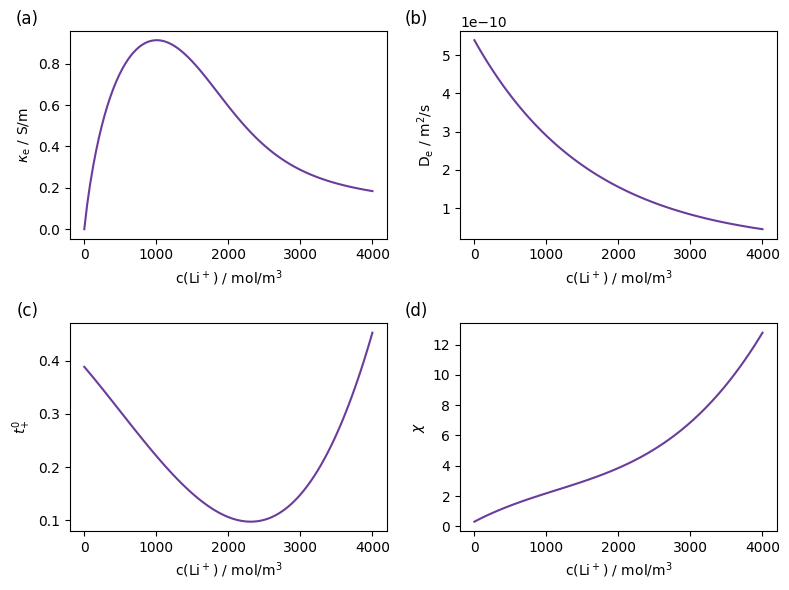

In [48]:
# plot and save Supplementary Figure 11. Electrolyte parameters
excel_file_path = os.path.join(SaveFig_Path, "Supplementary Figure 11_data.xlsx")
data_for_excel = {}

fig, Axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)
axs = Axs.flatten()

# conductivity:
axs[0].plot(c_e,cond, color = cm_4s[0], linestyle = '-' )
axs[0].set_ylabel("$\kappa_\mathrm{e}$ / S/m")
dict_fig_a = {}
dict_fig_a['c_e'] = c_e
dict_fig_a['cond'] = cond
df_fig_a = pd.DataFrame.from_dict(dict_fig_a, orient='index').T
data_for_excel['fig(a)'] = df_fig_a

# diffusivity:
axs[1].plot(c_e,D_e, color = cm_4s[0], linestyle = '-' )
axs[1].set_ylabel("D$_\mathrm{e}$ / m$^\mathrm{2}$/s")
dict_fig_b = {}
dict_fig_b['c_e'] = c_e
dict_fig_b['D_e'] = D_e
df_fig_b = pd.DataFrame.from_dict(dict_fig_b, orient='index').T
data_for_excel['fig(b)'] = df_fig_b

# t_plus:
axs[2].plot(c_e,t_0plus, color = cm_4s[0], linestyle = '-' )
axs[2].set_ylabel(r'$t_{+}^{0}$')
dict_fig_c = {}
dict_fig_c['c_e'] = c_e
dict_fig_c['t_0plus'] = t_0plus
df_fig_c = pd.DataFrame.from_dict(dict_fig_c, orient='index').T
data_for_excel['fig(c)'] = df_fig_c

# TDF:  
axs[3].plot(c_e,TDF, color = cm_4s[0], linestyle = '-' )
axs[3].set_ylabel(r'$\chi$')
dict_fig_d = {}
dict_fig_d['c_e'] = c_e
dict_fig_d['TDF'] = TDF
df_fig_d = pd.DataFrame.from_dict(dict_fig_d, orient='index').T
data_for_excel['fig(d)'] = df_fig_d

ABC_labels = [f"({chr(97 + i)})" for i in range(4)]      
for i in range(4):
    axs[i].set_xlabel(r"c(Li$^+$) / mol/m$^3$")
    axs[i].text(
        -0.1, 1.1, 
        ABC_labels[i], transform=axs[i].transAxes, 
        fontsize=fs+2, va='top', ha='right')
    
path_png = os.path.join(SaveFig_Path, 'Supplementary Figure 11.png')
plt.savefig(path_png, bbox_inches='tight', dpi=600) 
path_svg = os.path.join(SaveFig_Path, 'Supplementary Figure 11.svg')
plt.savefig(path_svg,bbox_inches='tight') 

# 保存到Excel文件
with pd.ExcelWriter(excel_file_path) as writer:
    for sheet_name, data in data_for_excel.items():
        df = pd.DataFrame(data)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Supplementary Figure 11 saved to {excel_file_path}")

In [68]:
sto_neg.ravel()

array([0.        , 0.0009009 , 0.0018018 , 0.0027027 , 0.0036036 ,
       0.0045045 , 0.00540541, 0.00630631, 0.00720721, 0.00810811,
       0.00900901, 0.00990991, 0.01081081, 0.01171171, 0.01261261,
       0.01351351, 0.01441441, 0.01531532, 0.01621622, 0.01711712,
       0.01801802, 0.01891892, 0.01981982, 0.02072072, 0.02162162,
       0.02252252, 0.02342342, 0.02432432, 0.02522523, 0.02612613,
       0.02702703, 0.02792793, 0.02882883, 0.02972973, 0.03063063,
       0.03153153, 0.03243243, 0.03333333, 0.03423423, 0.03513514,
       0.03603604, 0.03693694, 0.03783784, 0.03873874, 0.03963964,
       0.04054054, 0.04144144, 0.04234234, 0.04324324, 0.04414414,
       0.04504505, 0.04594595, 0.04684685, 0.04774775, 0.04864865,
       0.04954955, 0.05045045, 0.05135135, 0.05225225, 0.05315315,
       0.05405405, 0.05495495, 0.05585586, 0.05675676, 0.05765766,
       0.05855856, 0.05945946, 0.06036036, 0.06126126, 0.06216216,
       0.06306306, 0.06396396, 0.06486486, 0.06576577, 0.06666

Supplementary Figure 12 saved to D:\LRHWork\Model_RH\env_PBGEM_NC\SimSave\Li2024_Results\SaveFig\Supplementary Figure 12_data.xlsx


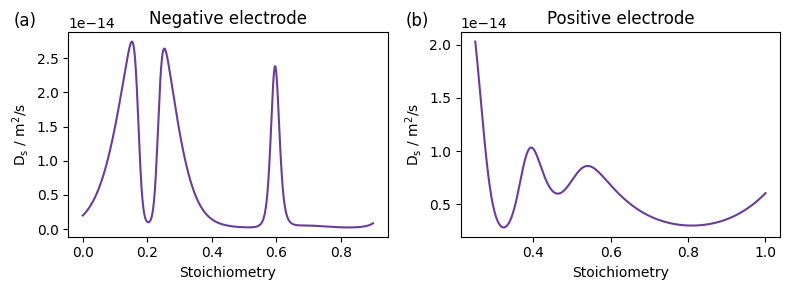

In [69]:
# Supplementary Figure 12. Solid-phase diffusivity at 25 °C used in this work
excel_file_path = os.path.join(SaveFig_Path, "Supplementary Figure 12_data.xlsx")
data_for_excel = {}

import pybamm
def graphite_LGM50_diffusivity_ORegan2022(sto, T):

    a0 = 11.17
    a1 = -1.553
    a2 = -6.136
    a3 = -9.725
    a4 = 1.85
    b1 = 0.2031
    b2 = 0.5375
    b3 = 0.9144
    b4 = 0.5953
    c0 = -15.11
    c1 = 0.0006091
    c2 = 0.06438
    c3 = 0.0578
    c4 = 0.001356
    d = 2092

    D_ref = (
        10
        ** (
            a0 * sto
            + c0
            + a1 * pybamm.exp(-((sto - b1) ** 2) / c1)
            + a2 * pybamm.exp(-((sto - b2) ** 2) / c2)
            + a3 * pybamm.exp(-((sto - b3) ** 2) / c3)
            + a4 * pybamm.exp(-((sto - b4) ** 2) / c4)
        )
        * 3.0321  # correcting factor (see O'Regan et al 2021)
    )

    #E_D_s = d * pybamm.constants.R
    E_D_s = pybamm.Parameter(
        "Negative electrode diffusivity activation energy [J.mol-1]")
    #print(E_D_s)
    arrhenius = pybamm.exp(E_D_s / pybamm.constants.R * (1 / 298.15 - 1 / T))

    return D_ref * arrhenius

def nmc_LGM50_diffusivity_ORegan2022(sto, T):

    a1 = -0.9231
    a2 = -0.4066
    a3 = -0.993
    b1 = 0.3216
    b2 = 0.4532
    b3 = 0.8098
    c0 = -13.96
    c1 = 0.002534
    c2 = 0.003926
    c3 = 0.09924
    d = 1449

    D_ref = (
        10
        ** (
            c0
            + a1 * pybamm.exp(-((sto - b1) ** 2) / c1)
            + a2 * pybamm.exp(-((sto - b2) ** 2) / c2)
            + a3 * pybamm.exp(-((sto - b3) ** 2) / c3)
        )
        * 2.7  # correcting factor (see O'Regan et al 2021)
    )

    # E_D_s = d * pybamm.constants.R
    E_D_s = pybamm.Parameter(
        "Positive electrode diffusivity activation energy [J.mol-1]")
    arrhenius = pybamm.exp(E_D_s / pybamm.constants.R * (1 / 298.15 - 1 / T))

    return D_ref * arrhenius
sto_neg = pybamm.linspace(0, 0.9, 1000)
Ds_neg = graphite_LGM50_diffusivity_ORegan2022(sto_neg, 273.15+25)

sto_pos = pybamm.linspace(0.25, 1, 1000)
Ds_pos = nmc_LGM50_diffusivity_ORegan2022(sto_pos, 273.15+25)

sto_neg = sto_neg.evaluate()
sto_pos = sto_pos.evaluate()
Ds_neg = Ds_neg.evaluate()
Ds_pos = Ds_pos.evaluate()

fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)
axs[0].plot(sto_neg, Ds_neg, color = cm_4s[0], linestyle = '-' )
dict_fig_a = {}
dict_fig_a['sto_neg'] = sto_neg.ravel()
dict_fig_a['Ds_neg'] = Ds_neg.ravel()
df_fig_a = pd.DataFrame.from_dict(dict_fig_a, orient='index').T
data_for_excel['fig(a)'] = df_fig_a

axs[1].plot(sto_pos, Ds_pos, color = cm_4s[0], linestyle = '-' )
dict_fig_b = {}
dict_fig_b['sto_pos'] = sto_pos.ravel()
dict_fig_b['Ds_pos'] = Ds_pos.ravel()
df_fig_b = pd.DataFrame.from_dict(dict_fig_b, orient='index').T
data_for_excel['fig(b)'] = df_fig_b

ABC_labels = [f"({chr(97 + i)})" for i in range(2)]      
for i in range(2):
    axs[i].set_xlabel("Stoichiometry")
    axs[i].text(
        -0.1, 1.1, 
        ABC_labels[i], transform=axs[i].transAxes, 
        fontsize=fs+2, va='top', ha='right')
    axs[i].set_ylabel("D$_\mathrm{s}$ / m$^\mathrm{2}$/s")
axs[0].set_title("Negative electrode")
axs[1].set_title("Positive electrode")
path_png = os.path.join(SaveFig_Path, 'Supplementary Figure 12.png')
plt.savefig(path_png, bbox_inches='tight', dpi=600) 
path_svg = os.path.join(SaveFig_Path, 'Supplementary Figure 12.svg')
plt.savefig(path_svg,bbox_inches='tight') 


# 保存到Excel文件
with pd.ExcelWriter(excel_file_path) as writer:
    for sheet_name, data in data_for_excel.items():
        df = pd.DataFrame(data)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Supplementary Figure 12 saved to {excel_file_path}")


In [ ]:
sto.evaluate()

array([[0.        ],
       [0.001001  ],
       [0.002002  ],
       [0.003003  ],
       [0.004004  ],
       [0.00500501],
       [0.00600601],
       [0.00700701],
       [0.00800801],
       [0.00900901],
       [0.01001001],
       [0.01101101],
       [0.01201201],
       [0.01301301],
       [0.01401401],
       [0.01501502],
       [0.01601602],
       [0.01701702],
       [0.01801802],
       [0.01901902],
       [0.02002002],
       [0.02102102],
       [0.02202202],
       [0.02302302],
       [0.02402402],
       [0.02502503],
       [0.02602603],
       [0.02702703],
       [0.02802803],
       [0.02902903],
       [0.03003003],
       [0.03103103],
       [0.03203203],
       [0.03303303],
       [0.03403403],
       [0.03503504],
       [0.03603604],
       [0.03703704],
       [0.03803804],
       [0.03903904],
       [0.04004004],
       [0.04104104],
       [0.04204204],
       [0.04304304],
       [0.04404404],
       [0.04504505],
       [0.04604605],
       [0.047